<a href="https://colab.research.google.com/github/shakasom/MapsDataScience/blob/master/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Performing Spatial operations like a Pro

## Installations

The geospatial libraries are not pre installed in google colab as standard python library, therefore we need to install some libraries to use. Luckily this is an easy process. You can use either apt install or pip install. You can also create anaconda environment, but that is a bit complex so pip and apt are enough in our case to get the libraries we need. These are the libraries we need to install in this tutorial:

Gdal
Geopandas
Folium

The installation might take 1 minute.


In [0]:
%%time 
!apt update
!apt upgrade
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium 

In [0]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt 
import folium
import os

## Data 

In [0]:
# Get the data from dropbox link
!wget https://www.dropbox.com/s/0zytrf2ncoquxgq/Foursquare_2014_NYC.zip

In [13]:
# see the folders available
import os
os.listdir(os.getcwd())

['.config', 'Foursquare_2014_NYC.zip', '.ipynb_checkpoints', 'sample_data']

In [14]:
# We have data zip that we have just downloaded so let us unzip it
!unzip Foursquare_2014_NYC.zip

Archive:  Foursquare_2014_NYC.zip
  inflating: dataset_TSMC2014_NYC.txt  


In [17]:
col_names = ['UserID', 'VenueID', 'VenueCategoryID', 
             'VenueCategoryName', 'Latitude', 'Longtitude',
            'Timezone', 'UTCtime']
nyc = pd.read_csv('dataset_TSMC2014_NYC.txt',names=col_names,sep="\t",  encoding = "ISO-8859-1" )
nyc.head()


,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


## Geometry and Coordinates

In [18]:
for lat, lon in zip(nyc['Latitude'][:5], nyc['Longtitude'][:5]):
    geometry = lat, lon
    print(geometry)

(40.71981037548853, -74.00258103213994)
(40.606799581406435, -74.04416981025437)
(40.71616168484322, -73.88307005845945)
(40.7451638, -73.982518775)
(40.74010382743943, -73.98965835571289)


In [19]:
for lat, lon in zip(nyc['Latitude'][:5], nyc['Longtitude'][:5]):
    geometry = Point(lat, lon)
    print(geometry)

POINT (40.71981037548853 -74.00258103213994)
POINT (40.60679958140643 -74.04416981025437)
POINT (40.71616168484322 -73.88307005845945)
POINT (40.7451638 -73.982518775)
POINT (40.74010382743943 -73.98965835571289)


In [20]:
geometry = [Point(xy) for xy in zip(nyc['Longtitude'], nyc['Latitude'])]
geometry[:5]

In [0]:
crs = {'init': 'epsg:4326'}

In [22]:
nyc_gdf = gpd.GeoDataFrame(nyc, crs=crs, geometry=geometry)
nyc_gdf.head()


,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,POINT (-74.00258103213994 40.71981037548853)
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,POINT (-74.04416981025437 40.60679958140643)
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,POINT (-73.88307005845945 40.71616168484322)
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,POINT (-73.982518775 40.7451638)
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,POINT (-73.98965835571289 40.74010382743943)


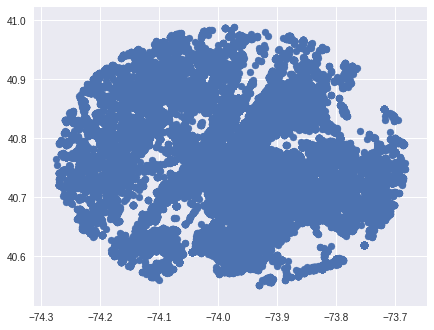

In [23]:
nyc_gdf.plot();

## Buffer Analysis


In [0]:
# Convert to UTM metre based projection: https://epsg.io/32618 
nyc_gdf_proj = nyc_gdf.to_crs({'init': 'epsg:32618'})
nyc_gdf_proj.head()

In [0]:
fig, ax = plt.subplots(figsize=(12, 10))
nyc_gdf_proj[:1].buffer(50).plot(ax=ax, color='gray');
nyc_gdf_proj[:1].buffer(10).plot(ax=ax, color='yellow');

nyc_gdf_proj[:1].plot(color = 'red', ax=ax);

In [0]:
fig, ax = plt.subplots(2,figsize=(12, 10))
nyc_gdf_proj[nyc_gdf_proj['VenueCategoryName']== 'Subway'].buffer(1000).plot(edgecolor='black', figsize=(12, 12), alpha=0.01,ax=ax[0]);
nyc_gdf_proj[nyc_gdf_proj['VenueCategoryName']== 'Asian Restaurant'].buffer(1000).plot(edgecolor='red', figsize=(12, 12), alpha=0.01, ax=ax[1]);



## Spatial join


In [0]:
url_dist = 'http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nyad/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson'
nyc_dist = gpd.read_file(url_dist)
nyc_dist.head()


In [0]:
nyc_dist.plot(column='AssemDist', figsize=(12,10));

In [0]:
nyc_dist.crs

In [0]:
# Convert to UTM metre based projection: https://epsg.io/32618 
nyc_dist_proj = nyc_dist.to_crs({'init': 'epsg:32618'})
nyc_dist_proj.head()

In [0]:
fig, ax = plt.subplots(figsize=(12,12))
nyc_dist_proj.plot(ax=ax, color='gray');
nyc_gdf_proj.plot(ax=ax, markersize=0.01, color='black');

In [0]:
nyc_points = gpd.sjoin(nyc_gdf_proj, nyc_dist_proj, op='within')
nyc_points.head(2)

In [0]:
fig, ax = plt.subplots(figsize=(12,12))
nyc_dist_proj.plot(ax=ax, color='gray');
nyc_points.plot(ax=ax, markersize=0.01, color='black');

## GeoVizualization


In [0]:
m = folium.Map (
    location = [40.71981037548853, -74.00258103213994],
    #tiles='Mapbox Bright',
    #zoom_start = 11
)
m


In [0]:
folium.GeoJson(nyc_points.sample(1000)).add_to(m)
m

In [0]:
from folium.plugins import FastMarkerCluster
sample = nyc_points.sample(10000)
lons = sample['Longtitude'] 
lats = sample['Latitude']
m = folium.Map(
    location = [np.mean(sample.Latitude), np.mean(sample.Longtitude)],
    tiles= 'Stamen Toner',
    zoom_start=13
    )
FastMarkerCluster(data=list(zip(lats, lons))).add_to(m)
folium.LayerControl().add_to(m)
m

In [0]:
lons = nyc_points['Longtitude'] 
lats = nyc_points['Latitude']
m = folium.Map(
    location = [np.mean(nyc_points.Latitude), np.mean(nyc_points.Longtitude)],
    tiles= 'Stamen Toner',
    zoom_start=12
    )
FastMarkerCluster(data=list(zip(lats, lons))).add_to(m)
folium.LayerControl().add_to(m)
m.save('cluster-full.html')